In [14]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import ipywidgets as widgets
import panel as pn
import math

In [2]:
def plot_fct(w= 4,style="dark_background"): 
    X=np.random.uniform(0,5,size=100)
    plt.style.use(style)
    Y=2*X+w*np.random.normal(size=100)
    plt.scatter(X,Y)
    plt.show()

In [3]:
widgets.interact(plot_fct,w=(0,5,0.5))


interactive(children=(FloatSlider(value=4.0, description='w', max=5.0, step=0.5), Text(value='dark_background'…

<function __main__.plot_fct(w=4, style='dark_background')>

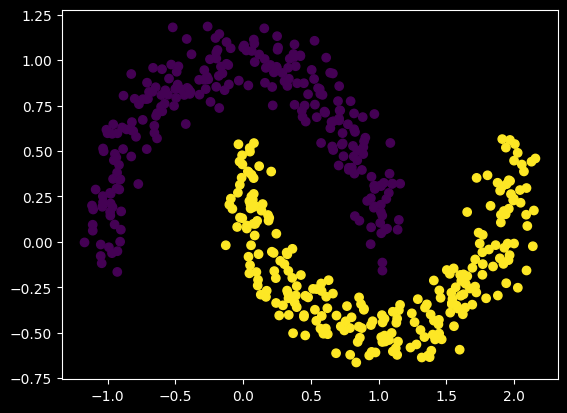

In [4]:
from sklearn.datasets import make_moons

moons=make_moons(n_samples=500,noise=0.1)
X ,y= moons[0],moons[1]
plt.scatter(X[:,0],X[:,1],c=y)
plt.show()

In [12]:
def plot_moons(sample=200,noise=0):
    moons=make_moons(n_samples=sample,noise=noise,random_state=50)
    X,y=moons[0],moons[1]
    plt.scatter(X[:,0],X[:,1],c=y)
    plt.show()

In [13]:
widgets.interact(plot_moons,sample=[200,500,1000],noise=(0,2,0.1))

interactive(children=(Dropdown(description='sample', options=(200, 500, 1000), value=200), FloatSlider(value=0…

<function __main__.plot_moons(sample=200, noise=0)>

In [10]:
def plot_sin(start=0,end=30,factor=1,grid=False,plot_cos=False):
    X=np.linspace(start,end,(end-start)*10)
    y=np.sin(X)*factor
    plt.grid(grid)
    plt.plot(X,y)
    if plot_cos:
        y=np.cos(X)
        plt.plot(X,y)

In [11]:
widgets.interact(plot_sin,start=(0,10,1),end=(20,50,1),factor=(0,5,0.1),grid=False)

interactive(children=(IntSlider(value=0, description='start', max=10), IntSlider(value=30, description='end', …

<function __main__.plot_sin(start=0, end=30, factor=1, grid=False, plot_cos=False)>

In [33]:
def plot_sigmoid(x_in=0):
    X=np.linspace(-5,5,1000)
    y=1/(1+np.exp(-X))
    y_in=1/(1+math.exp(-x_in))

    plt.plot(X,y)
    plt.scatter(x_in,y_in,c="r")
    plt.plot([x_in,x_in],[0,y_in],"r--")
    plt.plot([-5,x_in],[y_in,y_in],"r--")

In [34]:
widgets.interact(plot_sigmoid,x_in=(-5,5,0.1))

interactive(children=(FloatSlider(value=0.0, description='x_in', max=5.0, min=-5.0), Output()), _dom_classes=(…

<function __main__.plot_sigmoid(x_in=0)>

In [38]:
def plot_hist(mu=0,sigma=1,n=100,bins=10,color="blue"):
    plt.xlim(-20,20)
    X=np.random.normal(mu,sigma,n)
    plt.hist(X,bins,color=color)

In [39]:
widgets.interact(plot_hist,mu=(-10,10,0.5),sigma=(0,10,0.1),n=(10,100,1),bins=(1,100,1),color=["red","green","blue"])

interactive(children=(FloatSlider(value=0.0, description='mu', max=10.0, min=-10.0, step=0.5), FloatSlider(val…

<function __main__.plot_hist(mu=0, sigma=1, n=100, bins=10, color='blue')>

In [40]:
widgets.interact_manual(plot_hist,mu=(-10,10,0.5),sigma=(0,10,0.1),n=(10,100,1),bins=(1,100,1),color=["red","green","blue"])

interactive(children=(FloatSlider(value=0.0, description='mu', max=10.0, min=-10.0, step=0.5), FloatSlider(val…

<function __main__.plot_hist(mu=0, sigma=1, n=100, bins=10, color='blue')>